# 学生校园卡消费行为分析 

## 一、项目背景及分析目标

数据是某校学生一个月的校园卡门禁和消费刷卡数据，通过分析学生的行为数据，总结学生的消费特征，为食堂运营提供建议，并为学校判定学生的经济状况、贫困补助发放对象选定提供参考意见。

In [83]:
import numpy as np
import pandas as pd
from pyecharts.charts import *
import pyecharts.options as opts
from pyecharts.components import Table
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.options import ComponentTitleOpts
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
# import chinese_calendar

# 二、数据清洗

In [84]:
data1 = pd.read_csv('F:\迅雷下载\数据集\校园学生卡消费行为\data1.csv',encoding='gbk')
data2 = pd.read_csv('F:\迅雷下载\数据集\校园学生卡消费行为\data2.csv',encoding='gbk')
data3 = pd.read_csv('F:\迅雷下载\数据集\校园学生卡消费行为\data3.csv',encoding='gbk')

数据清洗

In [85]:
data1.columns=['序号','校园卡号','性别','专业','门禁卡号']
#查看校园卡号、门禁卡号是否有重复
data1['校园卡号'].nunique()


4341

In [86]:
data1.isnull().sum()

序号      0
校园卡号    0
性别      0
专业      0
门禁卡号    0
dtype: int64

In [87]:
data1.describe()

,序号,校园卡号,门禁卡号
count,4341.000000,4341.000000,4.341000e+03
mean,2171.000000,182161.785533,1.679700e+07
std,1253.283089,1309.570383,6.891622e+06
min,1.000000,164340.000000,3.077800e+04
25%,1086.000000,181084.000000,1.730412e+07
50%,2171.000000,182169.000000,1.944847e+07
75%,3256.000000,183254.000000,2.074742e+07
max,4341.000000,184339.000000,2.545070e+07


In [88]:
data1['校园卡号'].nunique()

4341

In [89]:
data1['门禁卡号'].nunique()#门禁卡号重复了怎么办？

4339

In [90]:
data1.describe(include=['O'])

,性别,专业
count,4341,4341
unique,2,41
top,女,18市场营销
freq,2460,200


In [91]:
data2.head(10)

,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,TermSerNo,conOperNo,OperNo,Dept
0,117342773,181316,20181316,2019/4/20 20:17,3.0,0.0,186.1,818,消费,49,NaN,NaN,235,第一食堂
1,117344766,181316,20181316,2019/4/20 8:47,0.5,0.0,199.5,814,消费,63,NaN,NaN,27,第二食堂
2,117346258,181316,20181316,2019/4/22 7:27,0.5,0.0,183.1,820,消费,63,NaN,NaN,27,第二食堂
3,117308066,181317,20181317,2019/4/21 7:46,3.5,0.0,50.2,211,消费,196,NaN,NaN,133,好利来食品店
4,117309001,181317,20181317,2019/4/19 22:31,2.5,0.0,61.7,209,消费,146,NaN,NaN,48,好利来食品店
5,117340105,181317,20181317,2019/4/20 12:14,8.0,0.0,53.7,210,消费,169,NaN,NaN,12,第三食堂
6,117340374,181317,20181317,2019/4/21 17:17,9.0,0.0,41.2,212,消费,169,NaN,NaN,12,第三食堂
7,117340515,181317,20181317,2019/4/22 11:48,8.0,0.0,33.2,213,消费,169,NaN,NaN,12,第三食堂
8,117305210,181318,20181318,2019/4/21 11:58,0.0,100.0,147.9,676,存款,202,NaN,NaN,143,财务处
9,117331420,181318,20181318,2019/4/20 12:05,7.0,0.0,53.4,673,消费,41,NaN,NaN,249,第四食堂


In [92]:
data2.isnull().sum()

Index             0
CardNo            0
PeoNo             0
Date              0
Money             0
FundMoney         0
Surplus           0
CardCount         0
Type              0
TermNo            0
TermSerNo    512106
conOperNo    519116
OperNo            0
Dept              0
dtype: int64

In [93]:
data2.apply(lambda x : sum(x.isnull())/len(x))

Index        0.000000
CardNo       0.000000
PeoNo        0.000000
Date         0.000000
Money        0.000000
FundMoney    0.000000
Surplus      0.000000
CardCount    0.000000
Type         0.000000
TermNo       0.000000
TermSerNo    0.986020
conOperNo    0.999517
OperNo       0.000000
Dept         0.000000
dtype: float64

In [94]:
data2=data2.drop(labels=['TermSerNo','conOperNo'],axis=1)

In [95]:
data2['Type'].unique()

array(['消费', '存款', '取款', '退款', '无卡销户', '发卡存款'], dtype=object)

In [96]:
card_an = data2.sort_values(by=['CardNo','Date'],inplace=False)

In [97]:
card_an.head(10)

,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,OperNo,Dept
500860,116944382,9,9,2019/4/1 12:04,0.4,0.0,22.54,1301,消费,63,27,第二食堂
500862,116950814,9,9,2019/4/1 12:05,2.5,0.0,20.04,1302,消费,181,27,第二食堂
500863,116950815,9,9,2019/4/1 12:05,3.5,0.0,16.54,1303,消费,181,27,第二食堂
500864,116957504,9,9,2019/4/1 12:05,1.5,0.0,15.04,1304,消费,7,27,第二食堂
178019,117104264,9,9,2019/4/10 12:02,0.4,0.0,82.94,1318,消费,63,27,第二食堂
178021,117124783,9,9,2019/4/10 12:02,1.5,0.0,81.44,1319,消费,7,27,第二食堂
178018,117094301,9,9,2019/4/10 12:03,3.5,0.0,77.94,1320,消费,8,27,第二食堂
178020,117120083,9,9,2019/4/10 12:05,2.5,0.0,75.44,1321,消费,20,235,第一食堂
453148,117138614,9,9,2019/4/11 12:00,0.4,0.0,75.04,1322,消费,63,27,第二食堂
453149,117162354,9,9,2019/4/11 12:01,2.0,0.0,73.04,1323,消费,7,27,第二食堂


In [98]:
data2['CardNo'].nunique()

8636

In [99]:
data2.apply(lambda x:x.nunique())

Index        519367
CardNo         8636
PeoNo          8636
Date          26965
Money           537
FundMoney       227
Surplus       24111
CardCount      5844
Type              6
TermNo          147
OperNo           74
Dept             33
dtype: int64

In [100]:
data2.columns=['消费流水','校园卡号','人员编号','消费日期','消费金额','存入金额','余额','消费次数','消费类型','消费项目编码','操作编码','消费地点']

In [101]:
data3.head()

,Index,AccessCardNo,Date,Address,Access,Describe
0,1330906,25558880,2019/4/1 0:00,第六教学楼[进门],1,允许通过
1,1330907,18413143,2019/4/1 0:02,第六教学楼[出门],1,允许通过
2,1331384,11642752,2019/4/1 0:00,飞凤轩[进门],1,允许通过
3,1330908,24124155,2019/4/1 0:00,第六教学楼[出门],1,允许通过
4,1331385,18629328,2019/4/1 0:11,飞凤轩[进门],1,允许通过


In [102]:
data3.isnull().sum()

Index           0
AccessCardNo    0
Date            0
Address         0
Access          0
Describe        0
dtype: int64

In [103]:
data3['Describe'].unique()

array(['允许通过', '禁止通过-没有权限'], dtype=object)

In [104]:
data3['Address'].unique()

array(['第六教学楼[进门]', '第六教学楼[出门]', '飞凤轩[进门]', '飞凤轩[出门]', '青鸾苑[进门]',
       '青鸾苑[出门]', '第七教学楼[进门]', '第五教学楼[出门]', '第五教学楼[进门]', '第七教学楼[出门]'],
      dtype=object)

In [105]:
data3.columns=['门禁流水','门禁卡号','通过时间','地点','是否通过','门禁描述']

In [106]:
#删除门禁未通过数据
data3.drop(data3[data3.是否通过 == 0].index,inplace= True)#根据index索引号删除

In [107]:
all_data=pd.merge(left=data2,right=data1,how='left',on='校园卡号')

In [108]:
all_data.head()
all_data.isnull().sum()

消费流水           0
校园卡号           0
人员编号           0
消费日期           0
消费金额           0
存入金额           0
余额             0
消费次数           0
消费类型           0
消费项目编码         0
操作编码           0
消费地点           0
序号        278288
性别        278288
专业        278288
门禁卡号      278288
dtype: int64

In [109]:
all_data_1=all_data.dropna(subset=['序号'])
all_data_1['消费类型'].value_counts()
条件 = "消费类型 in ['存款','无卡销户','退款','取款']"
all_data1 = all_data_1.drop(all_data_1.query(条件).index,inplace = False)

In [110]:
all_data1['消费日期']= pd.to_datetime(all_data1['消费日期'],format='%Y%m%d %H:%M', errors='ignore')
all_data1['日期'] = all_data1['消费日期'].dt.date 
all_data1['时间'] = all_data1['消费日期'].dt.time
all_data1['时间段'] = all_data1['消费日期'].dt.hour

In [111]:
all_data1['日期'].min()

datetime.date(2019, 4, 1)

In [112]:
all_data1['日期'].max()

datetime.date(2019, 4, 30)

In [113]:
all_data1.head()

,消费流水,校园卡号,人员编号,消费日期,消费金额,存入金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点,序号,性别,专业,门禁卡号,日期,时间,时间段
0,117342773,181316,20181316,2019-04-20 20:17:00,3.0,0.0,186.1,818,消费,49,235,第一食堂,1316.0,女,18工业设计,21516778.0,2019-04-20,20:17:00,20
1,117344766,181316,20181316,2019-04-20 08:47:00,0.5,0.0,199.5,814,消费,63,27,第二食堂,1316.0,女,18工业设计,21516778.0,2019-04-20,08:47:00,8
2,117346258,181316,20181316,2019-04-22 07:27:00,0.5,0.0,183.1,820,消费,63,27,第二食堂,1316.0,女,18工业设计,21516778.0,2019-04-22,07:27:00,7
3,117308066,181317,20181317,2019-04-21 07:46:00,3.5,0.0,50.2,211,消费,196,133,好利来食品店,1317.0,女,18工业设计,18649034.0,2019-04-21,07:46:00,7
4,117309001,181317,20181317,2019-04-19 22:31:00,2.5,0.0,61.7,209,消费,146,48,好利来食品店,1317.0,女,18工业设计,18649034.0,2019-04-19,22:31:00,22


## 三、总体消费情况分析：统计平均每次消费金额，人均每月消费金额。

In [114]:
#平均消费次数
avg_exp_count=all_data1.groupby('校园卡号')['消费流水'].count().reset_index() #用index左左右连接
avg_exp_count.head()

,校园卡号,消费流水
0,180001,32
1,180002,46
2,180004,96
3,180005,35
4,180006,23


In [115]:
num_avg=avg_exp_count['消费流水'].mean()

In [116]:
print('平均消费次数为：{:.2f}'.format(num_avg))

平均消费次数为：72.74


人均每月消费金额

In [202]:
exp_sum=all_data1.groupby('校园卡号')['消费金额'].sum().reset_index()['消费金额'].mean()
print('人均消费金额为：{:.2f}'.format(exp_sum))

人均消费金额为：288.78


In [203]:
a1=all_data1['消费金额'].mean()
print('平均每次消费金额为:{:.2f}'.format(a1))

平均每次消费金额为:3.97


# 学生消费特征分析：

1.	学生属性与消费特征关系分析：

- a.专业与消费能力的关系

In [118]:
all_data1_sum=all_data1.groupby('专业')['消费金额'].sum()
all_data1_count=all_data1.groupby('专业')['人员编号'].nunique()


In [119]:
all_sum_count=pd.merge(all_data1_sum,all_data1_count,left_index=True,right_index=True,how='inner')

In [120]:
all_sum_count['人均消费']=all_sum_count['消费金额']/all_sum_count['人员编号']

In [121]:
table_1=all_sum_count.sort_values(by='人均消费',ascending=False,inplace=False)

In [122]:
table_1.head()

,消费金额,人员编号,人均消费
专业,,,
18机械制造（学徒）,6359.50,14,454.250000
18模具设计,34005.30,89,382.082022
18电气自动化,25536.45,70,364.806429
18视觉传播,11651.79,33,353.084545
18汽车检测,21681.78,63,344.155238


In [123]:
table_3=all_data1.groupby(['专业','人员编号'])['消费金额'].sum().reset_index()
table_3=table_3.drop(columns=['人员编号'])
table_3.head(10)

,专业,消费金额
0,18产品艺术,242.1
1,18产品艺术,482.7
2,18产品艺术,425.6
3,18产品艺术,375.6
4,18产品艺术,199.3
5,18产品艺术,311.9
6,18产品艺术,219.8
7,18产品艺术,277.2
8,18产品艺术,270.0
9,18产品艺术,200.1


In [124]:
from scipy import stats

In [125]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
formula = '{} ~ {}'.format(table_3.columns[1], table_3.columns[0])
model = ols(formula, table_3).fit()
anovat = anova_lm(model)

In [126]:
print(anovat)

              df        sum_sq        mean_sq         F        PR(>F)
专业          40.0  4.161421e+06  104035.535364  4.619102  8.918837e-20
Residual  3162.0  7.121739e+07   22522.892764       NaN           NaN


In [127]:
print(anovat)

              df        sum_sq        mean_sq         F        PR(>F)
专业          40.0  4.161421e+06  104035.535364  4.619102  8.918837e-20
Residual  3162.0  7.121739e+07   22522.892764       NaN           NaN


In [128]:
table_4=all_data1.groupby(['性别','人员编号'])['消费金额'].sum().reset_index()

In [129]:
s_female=table_4[table_4['性别']=='女']['消费金额']
s_male=table_4[table_4['性别']=='男']['消费金额']

In [130]:
from scipy.stats import levene
stat, p = levene(s_female,s_male )
print(stat, p)

79.5367027557442 7.790475945850498e-19


In [131]:
import statsmodels.stats.weightstats as sw

In [132]:
tstats, pvalue = sw.ztest(s_female,s_male,value=0,alternative='two-sided')

In [133]:
print(tstats, pvalue)

-7.299952453848846 2.878694354475531e-13


In [134]:
#各性别消费均值
print(s_female.mean(),s_male.mean())

272.5731758530185 312.55938366717993


In [135]:
female_ratio=s_female.sum()/(s_female.sum()+s_male.sum())*100

In [136]:
print(female_ratio)

56.13813348854394


In [137]:
count_ratio=s_female.count()/(s_female.count()+s_male.count())*100

In [138]:
print(count_ratio)

59.475491726506405


In [139]:
stats.levene(s_female,s_male)

LeveneResult(statistic=79.5367027557442, pvalue=7.790475945850498e-19)

In [140]:
table_3['专业'].value_counts()

18软件技术        140
18会计          137
18连锁经营        133
18宝玉石鉴定       128
18机械制造        127
18金融管理        125
18国贸实务        116
18国际商务        106
18商务英语        102
18旅游管理         94
18计算机网络        93
18皮具艺术         91
18工程造价         91
18模具设计         89
18建筑工程         87
18社会工作         86
18市场营销         80
18电子商务         79
18审计           78
18工业设计         78
18艺术设计         76
18工业机器人        74
18国际金融         72
18电气自动化        70
18投资与理财        68
18建筑设计         67
18工商企管         66
18汽车检测         63
18嵌入式技术        63
18商务日语         61
18酒店管理         59
18计算机应用        56
18工业工程         55
18首饰设计         50
18动漫设计         47
18物流管理         42
18产品艺术         40
18环境艺术         37
18视觉传播         33
18市政工程         30
18机械制造（学徒）     14
Name: 专业, dtype: int64

In [141]:
#专业太多对前三个专业做分析

In [142]:
table_3_1=table_3[table_3['专业']=='18软件技术']['消费金额']
table_3_2=table_3[table_3['专业']=='18会计']['消费金额']
table_3_3=table_3[table_3['专业']=='18连锁经营']['消费金额']
条件 = "专业 in ['18软件技术','18会计','18连锁经营']"




table_4=table_3.loc[table_3.query(条件).index,:]
table_4.head()

,专业,消费金额
40,18会计,433.3
41,18会计,25.6
42,18会计,241.6
43,18会计,426.6
44,18会计,220.1


专业方差齐次分析

stats.levene(table_3_1,table_3_2,table_3_3)

In [143]:
#单因素方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
formula = '{} ~ {}'.format(table_4.columns[1], table_4.columns[0])
model = ols(formula, table_4).fit()
anovat = anova_lm(model)

In [144]:
print(anovat)

             df        sum_sq       mean_sq         F    PR(>F)
专业          2.0  6.386246e+04  31931.231600  2.024827  0.133344
Residual  407.0  6.418331e+06  15769.855846       NaN       NaN


In [145]:
#非参数检验 Kruskal-wallis
statistic,pvalue=stats.kruskal(table_3_1,table_3_2,table_3_3)

In [146]:
print(pvalue)

0.16571741046564653


综上，学生性别和专业对消费能力无大的影响。

 - b.分析不同性别的学生与消费项目的关系。

In [147]:
top10=all_data1['消费项目编码'].value_counts()[:10]
all_data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 232990 entries, 0 to 519366
Data columns (total 19 columns):
消费流水      232990 non-null int64
校园卡号      232990 non-null int64
人员编号      232990 non-null int64
消费日期      232990 non-null datetime64[ns]
消费金额      232990 non-null float64
存入金额      232990 non-null float64
余额        232990 non-null float64
消费次数      232990 non-null int64
消费类型      232990 non-null object
消费项目编码    232990 non-null int64
操作编码      232990 non-null int64
消费地点      232990 non-null object
序号        232990 non-null float64
性别        232990 non-null object
专业        232990 non-null object
门禁卡号      232990 non-null float64
日期        232990 non-null object
时间        232990 non-null object
时间段       232990 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(6)
memory usage: 35.6+ MB


In [148]:
all_data2=all_data1[all_data1['消费项目编码'].isin(top10.index)]

In [149]:
d3=all_data2[all_data2['性别']=='女']['消费项目编码'].value_counts().reset_index().rename(columns={'消费项目编码':'女'})
d4=all_data2[all_data2['性别']=='男']['消费项目编码'].value_counts().reset_index().rename(columns={'消费项目编码':'男'})

In [150]:
d3

,index,女
0,196,6850
1,63,5052
2,7,4680
3,134,3683
4,8,3649
5,111,3626
6,115,3585
7,4,3578
8,54,3107
9,100,2414


In [151]:
d5=pd.merge(d3,d4,on='index',how='inner')
d5

,index,女,男
0,196,6850,2977
1,63,5052,3742
2,7,4680,3142
3,134,3683,1145
4,8,3649,2576
5,111,3626,1042
6,115,3585,1148
7,4,3578,2911
8,54,3107,2813
9,100,2414,2020


In [152]:

c = (
    Bar()
    .add_xaxis(
   d5['index'].astype(str).tolist()
    )
  .add_yaxis('女生各项目消费次数', d5['女'].tolist())
    .add_yaxis('男生各项目消费次数',d5['男'].tolist())
      
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="销售前10的商品男女消费次数"),
    )
    
)
c.render_notebook()

不同性别的学生对消费项目的倾向有所不同，从图上的134项目，111项目以及115项目对比可以看出。

2. 聚类分析

用消费总金额，食堂消费金额，超市消费金额，消费频次作为特征用kmeans进行聚类，总结每一类的学生群体的消费特征。

In [153]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score

In [154]:
all_data1['消费地点'].value_counts()

第二食堂      72151
第五食堂      56023
第一食堂      30261
第四食堂      29247
第三食堂      22806
好利来食品店    13479
红太阳超市      6338
水电缴费处      1495
医务室         340
第二图书馆       138
第一图书馆       118
自然科学书库       85
基础课部         69
人文社科         64
飞凤轩宿管办       57
第七教学楼        57
教师食堂         53
第五教学楼        47
第四教学楼        43
第六教学楼        42
宿管办          33
第一教学楼        17
第三教学楼        15
第二教学楼         6
机电系           3
外语系           1
青鸾苑宿管办        1
工商系部          1
Name: 消费地点, dtype: int64

In [155]:
df_canteen=all_data1[all_data1['消费地点'].str.contains('食堂')].groupby('校园卡号')['消费金额'].sum()
df_supermarket=all_data1[(all_data1['消费地点']=='好利来食品店')|(all_data1['消费地点']=='红太阳超市')].groupby('校园卡号')['消费金额'].sum()
df_count_sum=all_data1.groupby('校园卡号').agg(all_money=('消费金额','sum'),all_count=('消费金额','count'))
df_count_sum.head()

,all_money,all_count
校园卡号,,
180001,161.6,32
180002,126.8,46
180004,572.0,96
180005,185.1,35
180006,85.7,23


In [156]:
df_1=pd.merge(df_count_sum,df_canteen,left_index=True,right_index=True,how='inner')

In [157]:
df_2=pd.merge(df_1,df_supermarket,left_index=True,right_index=True,how='inner')

In [158]:
df_2=df_2.rename(columns={'消费金额_x':'canteen_sum','消费金额_y':'supermarket_sum'})
df_2

,all_money,all_count,canteen_sum,supermarket_sum
校园卡号,,,,
180002,126.8,46,97.4,23.4
180004,572.0,96,530.0,42.0
180005,185.1,35,166.9,9.8
180006,85.7,23,81.7,4.0
180007,512.6,114,501.8,6.8
...,...,...,...,...
184334,66.8,21,58.7,7.0
184336,200.6,50,179.4,18.0
184337,377.5,70,333.0,44.5


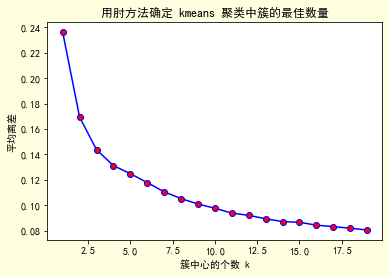

In [159]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
student_character_data=df_2
stdScale=MinMaxScaler().fit(df_2)
student_character_data_std=stdScale.transform(student_character_data)
Ks = range(1, 20)
meanDispersions = []
for k in Ks:
    km = KMeans(n_clusters=k,
               init='k-means++',
               n_init=10,
               max_iter=300,
               n_jobs=-1,
               random_state=0)
    
    km.fit(student_character_data_std)
    meanDispersions.append(sum(
            np.min(cdist(student_character_data_std, km.cluster_centers_, 'euclidean'), axis=1))/student_character_data_std.shape[0]) # 保存不同超参数对应模型的聚类偏差

plt.rcParams['font.sans-serif'] = 'SimHei'   
plt.figure('百里希文', facecolor='lightyellow')

# 绘制不同超参 K 对应的离差平方和折线图
plt.plot(Ks, meanDispersions,'bo-', mfc='r')
plt.xlabel('簇中心的个数 k')
plt.ylabel('平均离差')
plt.title('用肘方法确定 kmeans 聚类中簇的最佳数量')

plt.show()


In [160]:
#聚类数目怎么定

'''for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=1).fit(student_character_data_std)
    score=calinski_harabaz_score(student_character_data_std,kmeans.labels_)
    print(i,':',score)'''
kmeans=KMeans(n_clusters=4,random_state=1).fit(student_character_data_std)
student_character_label=pd.concat([pd.DataFrame(student_character_data_std),pd.Series(kmeans.labels_)],axis=1)
student_character_label.columns=['all_money','all_count','canteen_sum','supermarket_sum','label']
# student_character_label.query('label==0')
kmeans.cluster_centers_
# student_character_label.head()

array([[0.27587173, 0.25283353, 0.26903903, 0.07478217],
       [0.13760158, 0.11122721, 0.1284001 , 0.05057482],
       [0.57868887, 0.48366606, 0.56650511, 0.12800374],
       [0.40653648, 0.36213534, 0.40292038, 0.09221901]])

综上，第一类：（3,3，3,3）
第二类：（4,4,4,4）几项指标里面各项目都是最少，该类更倾向于贫困生的特点。
第三类：（1,1,1,1）
第四类：（2,2,2,2）

3. 低消费人群分析：统计低消费学生群体，总结低消费学生的消费特征（统计低消费学生常去消费的十个地点和前十消费项目）。

In [161]:
df_2=df_2.reset_index()

In [162]:
df_label=pd.concat([df_2,pd.Series(kmeans.labels_)],axis=1)

In [163]:
df_label.columns

Index(['校园卡号', 'all_money', 'all_count', 'canteen_sum', 'supermarket_sum', 0], dtype='object')

In [164]:
df_poor_student=df_label[df_label.iloc[:,5]==1]

In [165]:
df_poor_student.head()

,校园卡号,all_money,all_count,canteen_sum,supermarket_sum,0
0,180002,126.8,46,97.4,23.4,1
2,180005,185.1,35,166.9,9.8,1
3,180006,85.7,23,81.7,4.0,1
9,180013,175.9,50,98.2,77.7,1
14,180018,139.9,30,120.9,19.0,1


In [166]:
df_s=all_data1[all_data1['校园卡号'].isin(df_poor_student['校园卡号'])]

In [167]:
df_m=df_s['消费地点'].value_counts().reset_index().rename(columns={'index':'消费地','消费地点':'次数'})
df_m_10=df_m[:10]

In [168]:
pie=Pie(init_opts=opts.InitOpts(theme='chalk'))
pie.add('',[list(z) for z in zip(df_m_10['消费地'].tolist(),df_m_10['次数'].tolist())],itemstyle_opts=opts.ItemStyleOpts(border_color='black',border_width=1))
pie.set_global_opts(title_opts=opts.TitleOpts('低消费学生最喜欢去的十个地方'),
                       tooltip_opts=opts.TooltipOpts(trigger='item'),
                       legend_opts=opts.LegendOpts(pos_right='0%',pos_top='10%',orient='vertical')
                       )
pie.render_notebook()

In [169]:
def issame(df):
    df['diff']=df['消费日期'].diff(1) 
    df['diff_seconds']=df['diff'].dt.total_seconds()
    df['diff_seconds'].fillna(3600,inplace=True)
    df['mark']=df['diff_seconds'].apply(lambda x: 1 if x>=900 else 0)
    df.drop(columns=['diff','diff_seconds'],inplace=True)
    return df

## 食堂就餐情况分析：

1. 按就餐地点分析:各食堂就餐人数分析，就餐人数和餐厅员工人数比，再按早中晚餐来分析各食堂就餐人数和餐厅员工数比，以此来对比不同餐厅不同配餐时段的工作强度。

In [170]:
#各食堂就餐人数分析
all_data2=all_data1[all_data1['消费地点'].str.contains('食堂')].sort_values(by='消费日期',ascending=True).groupby('校园卡号').apply(issame
)   
all_data2.head()

,消费流水,校园卡号,人员编号,消费日期,消费金额,存入金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点,序号,性别,专业,门禁卡号,日期,时间,时间段,mark
119773,116949983,181944,20181944,2019-04-01 06:26:00,3.0,0.0,149.45,521,消费,174,27,第二食堂,1944.0,女,18建筑设计,19435482.0,2019-04-01,06:26:00,6,1
133559,116954650,181058,20181058,2019-04-01 06:33:00,2.4,0.0,115.40,620,消费,25,27,第二食堂,1058.0,男,18电气自动化,20017930.0,2019-04-01,06:33:00,6,1
133560,116954651,181058,20181058,2019-04-01 06:34:00,1.5,0.0,113.90,621,消费,25,27,第二食堂,1058.0,男,18电气自动化,20017930.0,2019-04-01,06:34:00,6,0
133557,116941088,181058,20181058,2019-04-01 06:35:00,0.6,0.0,113.30,622,消费,54,27,第二食堂,1058.0,男,18电气自动化,20017930.0,2019-04-01,06:35:00,6,0
187325,116937429,183391,20183391,2019-04-01 06:39:00,3.0,0.0,75.50,607,消费,26,27,第二食堂,3391.0,女,18皮具艺术,1238278.0,2019-04-01,06:39:00,6,1


In [171]:
t1=all_data2[all_data2['mark']==1]

In [172]:
t2=t1.groupby('消费地点')['消费日期'].count().reset_index()

In [173]:
c = (
    Bar()
    .add_xaxis(
   t2['消费地点'].astype(str).tolist()
    )
  .add_yaxis('消费次数',t2['消费日期'].tolist()
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title=""),
    ))
    
c.render_notebook()

In [174]:
def time_func(x):
    if 6<=x<=10:
        return '早饭'
    elif 10<x<15:
        return '中饭'
    elif 15<=x<22:
        return '晚饭'
    else:
        return '夜宵'

In [175]:
all_data2['餐饭']=all_data2['时间段'].apply(lambda x:time_func(x))

In [176]:
t3=all_data2.groupby(['消费地点','餐饭'])['消费日期'].count()


In [177]:
t4=t3.unstack()

t4.fillna(0)
t4.index

Index(['教师食堂', '第一食堂', '第三食堂', '第二食堂', '第五食堂', '第四食堂'], dtype='object', name='消费地点')

In [178]:
c = (
    Bar()
    .add_xaxis(
   t4.index.astype(str).tolist()
    )
  .add_yaxis('早饭',t4['早饭'].tolist())
    .add_yaxis('午饭',t4['中饭'].tolist())
    .add_yaxis('晚饭',t4['晚饭'].tolist())
    .add_yaxis('夜宵',t4['夜宵'].tolist())
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="各食堂各餐次就餐人数"),
    ))
    
c.render_notebook()

2. 按时间分析：工作日/非工作日不同时段消费次数分析。

In [179]:
# all_data2['is_holiday']=all_data2['消费日期'].apply(lambda x:chinese_calendar.is_holiday(x))
all_data2['周几']=all_data2['消费日期'].dt.dayofweek+1

In [180]:
all_data2_weekend=all_data2[(all_data2['周几']==6)|(all_data2['周几']==7)]

In [181]:
all_data2_workday=all_data2[~(all_data2['周几']==6)|(all_data2['周几']==7)]

In [182]:
all_data2_weekend_hour=all_data2_weekend.groupby('时间段')['消费日期'].count().reset_index()
all_data2_workday_hour=all_data2_workday.groupby('时间段')['消费日期'].count().reset_index()
all_data2_weekend_hour

,时间段,消费日期
0,6,213
1,7,1302
2,8,1630
3,9,1323
4,10,940
5,11,4977
6,12,3872
7,13,857
8,14,80
9,15,41


In [183]:
#做出每天的pv与uv趋势图
line_pv=(
    Line()
    .add_xaxis(all_data2_weekend_hour['时间段'].astype(str).tolist())
    .add_yaxis(
        "周末各时段消费次数",
     all_data2_weekend_hour['消费日期'].tolist()
    )
    .add_yaxis(
       "工作日各时段消费次数",
   all_data2_workday_hour['消费日期'].tolist()
    )
    .set_global_opts(
 
        title_opts=opts.TitleOpts(title="各时段消费次数"),
))

line_pv.render_notebook()

3. 食堂消费与教学楼的关系：分析各门禁通过前10的专业，各消费点消费前10专业。

In [184]:
data3.head()

,门禁流水,门禁卡号,通过时间,地点,是否通过,门禁描述
0,1330906,25558880,2019/4/1 0:00,第六教学楼[进门],1,允许通过
1,1330907,18413143,2019/4/1 0:02,第六教学楼[出门],1,允许通过
2,1331384,11642752,2019/4/1 0:00,飞凤轩[进门],1,允许通过
3,1330908,24124155,2019/4/1 0:00,第六教学楼[出门],1,允许通过
4,1331385,18629328,2019/4/1 0:11,飞凤轩[进门],1,允许通过


In [185]:
data1.head()

,序号,校园卡号,性别,专业,门禁卡号
0,1,180001,男,18国际金融,19762330
1,2,180002,男,18国际金融,20521594
2,3,180003,男,18国际金融,20513946
3,4,180004,男,18国际金融,20018058
4,5,180005,男,18国际金融,20945770


In [186]:
t4=pd.merge(data3,data1,on='门禁卡号',how='inner')
t4

,门禁流水,门禁卡号,通过时间,地点,是否通过,门禁描述,序号,校园卡号,性别,专业
0,1330924,19536490,2019/4/1 2:23,第六教学楼[出门],1,允许通过,1560,181560,男,18模具设计
1,1330926,19536490,2019/4/1 3:13,第六教学楼[进门],1,允许通过,1560,181560,男,18模具设计
2,1330995,19536490,2019/4/1 9:34,第六教学楼[进门],1,允许通过,1560,181560,男,18模具设计
3,1332128,19536490,2019/4/1 21:42,第六教学楼[进门],1,允许通过,1560,181560,男,18模具设计
4,1332282,19536490,2019/4/5 7:01,第六教学楼[出门],1,允许通过,1560,181560,男,18模具设计
...,...,...,...,...,...,...,...,...,...,...
18280,1372178,19923658,2019/4/28 18:36,第六教学楼[进门],1,允许通过,1407,181407,男,18机械制造
18281,1372179,19923658,2019/4/28 18:37,第六教学楼[进门],1,允许通过,1407,181407,男,18机械制造
18282,1377047,352534,2019/4/28 18:41,第七教学楼[出门],1,允许通过,3435,183435,男,18视觉传播
18283,1377061,16625461,2019/4/28 19:24,第七教学楼[进门],1,允许通过,3987,183987,男,18工商企管


In [187]:
t4['地点'].value_counts()

飞凤轩[进门]      6013
飞凤轩[出门]      5995
第六教学楼[进门]    3049
第六教学楼[出门]    2887
第七教学楼[进门]     109
青鸾苑[进门]        60
青鸾苑[出门]        58
第五教学楼[进门]      50
第七教学楼[出门]      37
第五教学楼[出门]      27
Name: 地点, dtype: int64

In [188]:
t4['地点']=t4['地点'].str.split("[",expand=True)[0]
t4['地点'].value_counts()

飞凤轩      12008
第六教学楼     5936
第七教学楼      146
青鸾苑        118
第五教学楼       77
Name: 地点, dtype: int64

In [189]:
t4.head()
t4['专业'].value_counts()

18连锁经营        2507
18电气自动化       1833
18模具设计        1821
18工程造价        1700
18工业机器人       1392
18电子商务        1324
18工商企管        1067
18建筑设计         940
18皮具艺术         806
18建筑工程         726
18艺术设计         620
18工业设计         609
18视觉传播         436
18产品艺术         435
18动漫设计         356
18环境艺术         336
18机械制造         301
18金融管理         162
18商务日语         149
18市政工程         135
18汽车检测          97
18会计            71
18软件技术          66
18社会工作          65
18市场营销          47
18国贸实务          46
18物流管理          42
18嵌入式技术         41
18国际商务          38
18计算机应用         23
18机械制造（学徒）      19
18投资与理财         18
18宝玉石鉴定         15
18首饰设计          15
18计算机网络         11
18商务英语           9
18酒店管理           4
18国际金融           3
Name: 专业, dtype: int64

In [190]:
t5=t4.pivot_table(index='地点',values=['通过时间'],columns=['专业'],aggfunc='count')

In [191]:
t5=t5.fillna(0)


In [192]:
t6=t5.loc['飞凤轩']

In [193]:
t7=t6.sort_values(ascending=False)

In [194]:
t8=t7[:10]
t8.values
index_t=t8.index.droplevel()
index_t

Index(['18连锁经营', '18工程造价', '18电子商务', '18工商企管', '18建筑设计', '18皮具艺术', '18建筑工程',
       '18艺术设计', '18视觉传播', '18产品艺术'],
      dtype='object', name='专业')

In [195]:
c = (
    Bar()
    .add_xaxis(
   index_t.astype(str).tolist()
    )
  .add_yaxis('专业',t8.values.tolist())
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="飞凤轩前10专业通过人数"),
    ))
    
c.render_notebook()

In [196]:
t6=t5.loc['第六教学楼']
t7=t6.sort_values(ascending=False)
t8=t7[:10]
t8.values
index_t=t8.index.droplevel()
c = (
    Bar()
    .add_xaxis(
   index_t.astype(str).tolist()
    )
  .add_yaxis('专业',t8.values.tolist())
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="第六教学楼前10专业通过人数"),
    ))
    
c.render_notebook()

各消费点消费前10专业

In [197]:
all_data2['消费地点'].value_counts()

第二食堂    72151
第五食堂    56023
第一食堂    30261
第四食堂    29247
第三食堂    22806
教师食堂       53
Name: 消费地点, dtype: int64

In [198]:
data3=all_data2.pivot_table(index='消费地点',columns='专业',values='消费日期',aggfunc='count')

In [199]:
data3=data3.fillna(0)
data3

专业,18产品艺术,18会计,18动漫设计,18商务日语,18商务英语,18国贸实务,18国际商务,18国际金融,18宝玉石鉴定,18审计,...,18社会工作,18艺术设计,18视觉传播,18计算机应用,18计算机网络,18软件技术,18连锁经营,18酒店管理,18金融管理,18首饰设计
消费地点,,,,,,,,,,,,,,,,,,,,,
教师食堂,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,4.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
第一食堂,587.0,475.0,777.0,373.0,522.0,441.0,592.0,345.0,170.0,416.0,...,269.0,686.0,664.0,330.0,99.0,281.0,2253.0,258.0,408.0,312.0
第三食堂,15.0,1856.0,55.0,714.0,1081.0,1327.0,1342.0,581.0,1716.0,1149.0,...,850.0,61.0,39.0,960.0,1589.0,1838.0,194.0,538.0,1463.0,682.0
第二食堂,1025.0,902.0,1448.0,370.0,1132.0,827.0,1288.0,550.0,238.0,808.0,...,479.0,2463.0,1409.0,642.0,318.0,575.0,6885.0,476.0,1143.0,150.0
第五食堂,5.0,4712.0,71.0,1454.0,2947.0,3503.0,3284.0,1767.0,4972.0,3119.0,...,2370.0,113.0,89.0,1779.0,2863.0,3793.0,349.0,1519.0,3803.0,1575.0
第四食堂,640.0,629.0,831.0,394.0,523.0,776.0,407.0,393.0,333.0,246.0,...,438.0,558.0,488.0,138.0,227.0,411.0,1651.0,418.0,453.0,125.0


In [200]:
data_1=data3.loc['第一食堂'].sort_values(ascending=False)[:10]
data_1_index=data_1.index
data_1_value=data_1.values
data_2=data3.loc['第二食堂'].sort_values(ascending=False)[:10]
data_2_index=data_2.index
data_2_value=data_2.values
data_3=data3.loc['第三食堂'].sort_values(ascending=False)[:10]
data_3_index=data_3.index
data_3_value=data_3.values
data_4=data3.loc['第四食堂'].sort_values(ascending=False)[:10]
data_4_index=data_4.index
data_4_value=data_4.values
data_5=data3.loc['第五食堂'].sort_values(ascending=False)[:10]
data_5_index=data_5.index
data_5_value=data_5.values

Text(0.5, 1.0, '第三食堂消费次数前10专业')

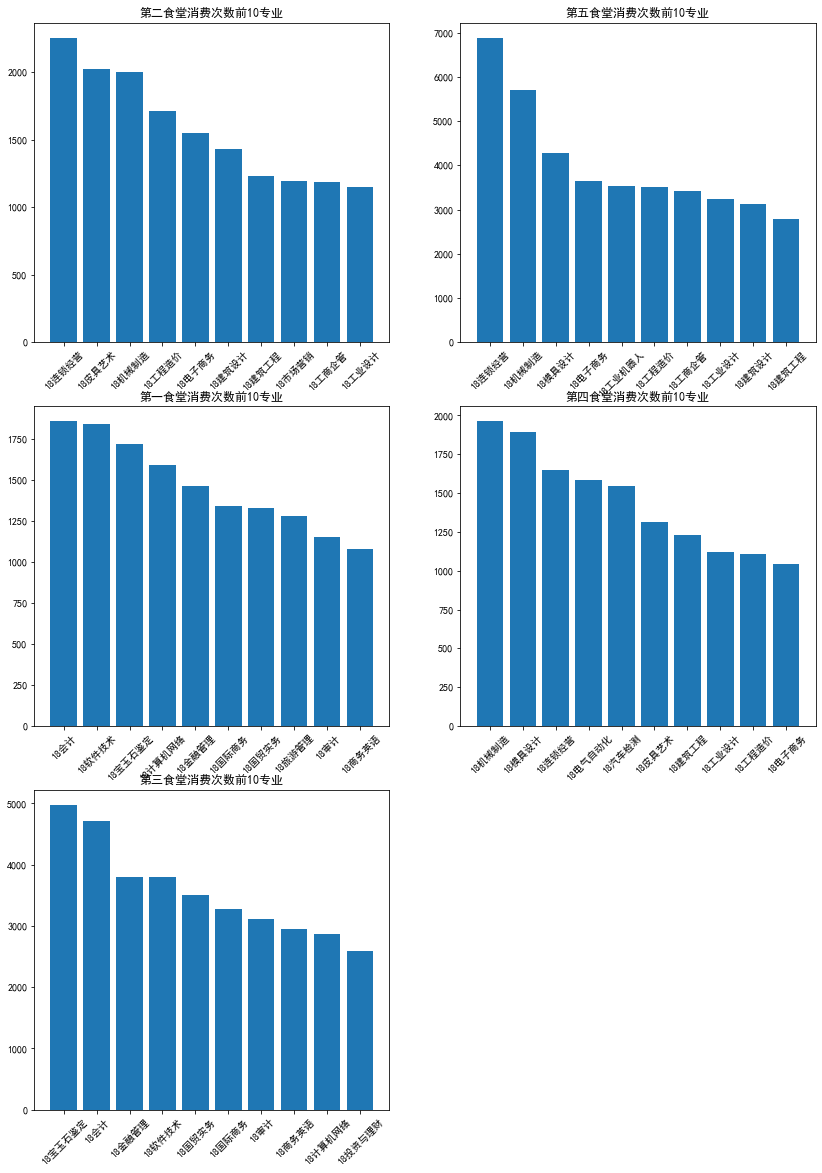

In [201]:
fig13 = plt.figure(figsize= (14,20))
ax1 = fig13.add_subplot(3,2,1)
x1 = data_1_index
y1 = data_1_value
plt.bar(x1,y1)
plt.xticks(rotation=45)
plt.title('第二食堂消费次数前10专业')
ax2 = fig13.add_subplot(3,2,2)
x2 = data_2_index
y2 = data_2_value
ax2.bar(x2,y2)
plt.xticks(rotation=45)
plt.title('第五食堂消费次数前10专业')
ax3 = fig13.add_subplot(3,2,3)
x3 = data_3_index
y3 = data_3_value
ax3.bar(x3,y3)
plt.xticks(rotation=45)
plt.title('第一食堂消费次数前10专业')
ax4= fig13.add_subplot(3,2,4)
x4 = data_4_index
y4 = data_4_value
ax4.bar(x4,y4)
plt.xticks(rotation=45)
plt.title('第四食堂消费次数前10专业')
ax5 = fig13.add_subplot(3,2,5)
x5 = data_5_index
y5 = data_5_value
ax5.bar(x5,y5)
plt.xticks(rotation=45)
plt.title('第三食堂消费次数前10专业')

综上：
1)18级学生门禁通过地点主要是飞凤轩和第六教学楼，占比超过98.14%。可以推测18级的学生的主要课程集中在这两处教学楼。
2)与飞凤轩关联密切的专业为：连锁经营，工程造价，电子商务，工商管理；与第六教学关联密切的专业为：电器自动化，模具设计，工业机器人，上课地点较为集中；
3)结合各食堂主要的消费的学生所在专业分析，集中在飞凤轩、第六教学楼通过的连锁经营、工程造价，电子商务、机械知道等专业的学生，集中在第二食堂消费，其次是在第一、四食堂消费。
4)未经常在门禁点通过的会计、宝玉石鉴定、软件等相关专业的同学，集中在第五食堂消费，其次是在第三食堂和好利来食品店消费。可以推测18级的同学第二、五食堂是学校的消费的最集中的地点。与不同专业的同学的上课地点相关，同时其他食堂的可能在其他年级的地点附近，导致的消费数量差异。

## 重要分析结论及建议：

1)	总体来看，学生人均每月消费总额为72.74元，平均每次消费金额为288.78，整体消费水平不高。
2)	学生消费特征总结，消费能力与专业和性别基本无关，不同性别对消费项目的倾向有明显不同。
3)	贫困补助发放参考意见，按照统计的低消费学生人群作为贫困生补助发放名单的参考。
4)	食堂运营建议，从每周的消费次数汇总上看，周一至周三消费次数较高，并且逐步下降。食堂可以重点应对周一至周三，提高供应量，周四周五可适当降低。周末的刷卡消费次数为平常的12%。食堂可以适当安排休息，减少人力成本浪费。通过分析发现食堂消费与教学楼地点存在关联，食堂可以依据各教学楼的专业与上课时间，可以预估就餐消费人数，优化原材料准备。